<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#description" data-toc-modified-id="description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>description</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#external-library" data-toc-modified-id="external-library-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>external library</a></span></li><li><span><a href="#my-function" data-toc-modified-id="my-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>my function</a></span></li></ul></li><li><span><a href="#input-for-the-code" data-toc-modified-id="input-for-the-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>input for the code</a></span><ul class="toc-item"><li><span><a href="#load-the-microstructure" data-toc-modified-id="load-the-microstructure-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>load the microstructure</a></span></li></ul></li><li><span><a href="#run-the-code" data-toc-modified-id="run-the-code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>run the code</a></span></li><li><span><a href="#save-results" data-toc-modified-id="save-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>save results</a></span></li><li><span><a href="#load-the-results" data-toc-modified-id="load-the-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>load the results</a></span></li></ul></div>

# Phase-field model for growth and coarsening of Si precipitate in AlSi10Mg SLM in a super-saturated matrix
This model is based on the Kim-Kim-Suzuki model [1]
References:


[1] Kim, Kim, and Suzuki. "Phase-field model for binary alloys." Physical Review E 60:6;7186-7197 (1999).


# Import

## external library

In [4]:
import os
import numpy as np
import importlib
import collections
from os import chdir
from scipy.interpolate import UnivariateSpline #pour ma spline
import sys
import random
import importlib
from scipy.interpolate import splev, splrep
from itertools import cycle
import pyFi_adapt
importlib.reload(pyFi_adapt)
from pyFi_adapt import *
import pyvista as pv
import matplotlib.pyplot as plt


## Post_process

In [2]:
def plot_micro(output,title,Nx,Ny,dx,dy,key):
    import matplotlib.pyplot as plt 
    import matplotlib.transforms as tfrms
    x_max=Nx*dx
    y_max=Ny*dy
    out=output.reshape(output.shape[0],output.shape[1]).transpose()
    if (key=='eta'):
        vmax=1
    else:
        vmax=0.025
    vmin=0
    plt.imshow(out ,extent=[0,x_max,y_max,0],vmin=vmin, vmax=vmax) #cmap='RdBu'
    plt.colorbar()
    ax = plt.gca()
    trans = tfrms.blended_transform_factory( ax.transData, ax.transAxes )
    plt.errorbar( 0, 0.0, color='k', capsize=1, transform=trans )
    ax.set_xlabel('x [nm]') 
    ax.set_ylabel('y [nm]') 
    plt.title(title)
    #plt.show()
    plt.savefig(os.path.join('save_fig',title))
    plt.close()

In [29]:
"""
Save_path =os.path.join(os.getcwd(),'saved_maps') 
file_name="map650.80s_400_600.07K.npz"
dout=dict(np.load(os.path.join(Save_path, file_name)))
dout.keys()
"""

'\nSave_path =os.path.join(os.getcwd(),\'saved_maps\') \nfile_name="map650.80s_400_600.07K.npz"\ndout=dict(np.load(os.path.join(Save_path, file_name)))\ndout.keys()\n'

In [5]:
from operator import itemgetter
Save_path =os.path.join(os.getcwd(),'saved_maps_Big_grid') # _Big_grid
array_filenames=[]
array_Temp=[]
for filename in os.listdir(Save_path):
    array_filenames.append(filename)
    array_Temp.append(filename[-11:-8])
array_index=sorted(range(len(array_Temp)), key=lambda k: array_Temp[k])
array_Temp.sort(key = int)
array_filenames.sort()
print(array_Temp)


array_filenames_sorted=[]
for i in range(len(array_filenames)):
    array_filenames_sorted.append(array_filenames[array_index[i]])
array_filenames=array_filenames_sorted    
print(array_filenames)


['400', '424', '449', '458', '466', '474', '483', '491', '499', '507', '516', '524', '532', '541', '549', '557', '566', '574', '589', '610', '638', '669', '678', '683', '690', '693', '694', '699', '699', '700', '700', '702', '703', '706', '713', '719']
['map0.25s_400_400.00K.npz', 'map75.00s_400_424.92K.npz', 'map149.75s_400_449.83K.npz', 'map174.66s_400_458.14K.npz', 'map199.58s_400_466.44K.npz', 'map224.50s_400_474.75K.npz', 'map249.41s_400_483.06K.npz', 'map274.33s_400_491.36K.npz', 'map299.25s_400_499.67K.npz', 'map324.17s_400_507.97K.npz', 'map349.08s_400_516.28K.npz', 'map374.00s_400_524.58K.npz', 'map398.92s_400_532.89K.npz', 'map423.83s_400_541.20K.npz', 'map448.75s_400_549.50K.npz', 'map473.67s_400_557.81K.npz', 'map498.58s_400_566.11K.npz', 'map523.50s_400_574.42K.npz', 'map570.62s_400_589.52K.npz', 'map760.33s_400_610.24K.npz', 'map1140.99s_400_638.15K.npz', 'map2090.79s_400_669.20K.npz', 'map2662.40s_400_678.94K.npz', 'map3043.31s_400_683.52K.npz', 'map3612.44s_400_690.19K.

In [6]:
array_dict=[]

for i in range(len(array_Temp)):
    file_name=array_filenames[i]
    temp=array_Temp
    str='dout_'+array_Temp[i]
    globals()[str]=dict(np.load(os.path.join(Save_path, file_name)))
    array_dict.append(globals()[str])

print(array_dict[0]['T_out'].max(),array_dict[-1]['T_out'].max()) #check step

400.0 719.0041600368456


In [7]:
eta_out=array_dict[-1]['eta']
X_out=array_dict[-1]['X']
Nx = eta_out.shape[0]
Ny = eta_out.shape[1]
Nz =1  
dx=  0.5*1e-9 # [m]
dy= 1*dx      # [m]
dz= dx # [m]

In [ ]:
key='X'
for i in range(len(array_Temp)):
    Var=array_dict[i][key]
    title=key+'$_{Si}$ at '+array_Temp[i]+' K'
    plot_micro(Var,title,Nx,Ny,dx,dy,key)

    

### Cell for maximum temperature

In [ ]:
key='X'
for i in range(len(array_dict)):
    eta_out=array_dict[i]['eta']
    X_out=array_dict[i]['X']
    # plot microstructure

    # grid2 : visualize eta variable
    grid2 = pv.UniformGrid()
    grid2.spacing=np.array([dx,dx,dx])*1E9
    grid2.dimensions = np.array([Nx,Ny,Nz])#+1
    grid2.point_data['X$_{Si}$'] = np.transpose(np.resize(eta_out,[Nx,Ny,Nz])).flatten()  # Flatten the array!

    # grid : visualize X variable
    grid  = pv.UniformGrid()
    grid.spacing=np.array([dx,dx,dx])*1E9
    grid.dimensions = np.array([Nx,Ny,Nz])#+1
    grid.point_data["Si [mol. %]"] = np.transpose(np.resize(X_out*100,[Nx,Ny,Nz])).flatten()


    pv.set_plot_theme("document")           # = theme
    cmap = plt.cm.get_cmap("coolwarm", 250) # = color map 

    # contours for eta variable = 0.1 and 0.9
    contours = grid2.contour(isosurfaces=2,rng=([0.1,0.9])) #[0.5, 1]

    outline = grid.outline()

    sargs = dict(height=0.5, vertical=True, position_x=0.8, position_y=0.25,label_font_size=12,font_family="arial")  #title='X_Si [mol. %]'
    #sargs = dict(interactive=True)

    p = pv.Plotter(off_screen=True) #notebook=False


    p.add_mesh(outline, color="k")

    p.camera_position =  'xy'
    p.update_scalar_bar_range([0,2.5], name=None)
    p.add_mesh(grid,cmap='rainbow' ,show_scalar_bar=True,scalar_bar_args=sargs, opacity=0.9,clim=[0,2.5])#)#,
    p.add_mesh(contours,cmap=cmap,  color="y") #color="black",,clim=[1.,1.]

    p.show_bounds(all_edges=True,xlabel="x [nm]",ylabel="y [nm]",zlabel="z [nm]")

    title=key+'r"_{Si}$" at '+array_Temp[i]+' K'

    p.add_text(array_Temp[i]+' K',  position=(0.45,0.65), color='y', shadow=True, font_size=16, viewport='True')
    #p.add_title(title)
    p.screenshot("X_Si"+array_Temp[i]+'_K'+".png")  #jupyter_backend='None'
    #pv.plotting._ALL_PLOTTERS.clear()

### Si, eta, Surf 

In [8]:
Save_path =os.path.join(os.getcwd()) 
dout=dict(np.load(os.path.join(Save_path,"map4754.92s_400_700.29K.npz")))  #map3612.44s_400_690.19K.npz
dout.keys()

dict_keys(['ttime', 'time_out', 'T_out', 'X_al_mean_out', 'X_th_mean_out', 'eta_mean_out', 'surf_out', 'X', 'X_al', 'X_th', 'eta', 'xv_out'])

In [9]:
T = dout["T_out"]
t = dout["time_out"]
eta = dout["eta_mean_out"]
X_al = dout["X_al_mean_out"]
surf = dout["surf_out"]
xv_out = dout["xv_out"]

In [10]:
dout["T_mean"]=dout["T_out"]
dout["eta_mean"]=dout["eta_mean_out"]
dout["t_mean"]=dout["time_out"]

In [11]:
index=0
N=75   # fitting parameter 
m=1
T=T[index:-1][0:-m:N]
t=t[index:-1][0:-m:N]
eta=eta[index:-1][0:-m:N]
X_al =X_al[index:-1][0:-m:N]
surf=surf[index:-1][0:-m:N]
xv_out=xv_out[index:-1][0:-m:N]
dout["T_mean"]=dout["T_mean"][index:-1][0:-m:N]
dout["eta_mean"]=dout["eta_mean"][index:-m][0:-1:N]
dout["t_mean"]=dout["t_mean"][index:-1][:-m:N]

In [12]:
len(t),len(T),len(X_al),len(eta),len(xv_out)

(257, 257, 257, 257, 257)

In [13]:
n=len(X_al[X_al>0.025])
X_al[X_al>0.025] = 0.025+ np.arange(1,0.001,-1/(n))*1e-4  # for a smooth fitting
t_X_al_mod = t
X_al_mod=X_al

Text(0, 0.5, '$\\langle X_{Si}^{\\alpha}\\rangle ~\\left[mol. \\% \\right] $')

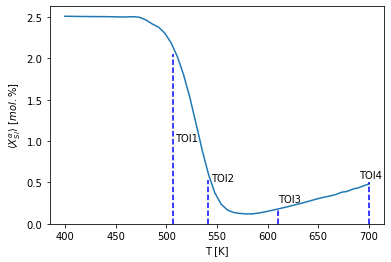

In [15]:
X_al_s=UnivariateSpline(x=t_X_al_mod, 
                       y=X_al_mod, 
                       w=None, bbox=[None, None], k=3, s=2.8e-8, 
                       ext=0, check_finite=False)

#plt.plot(t*(1/3)+400,X_al,color="b",label="brut")
 
#plt.plot(t_X_al_mod*(1/3)+400,X_al_mod,color="g",label="brut modfi")
plt.plot(T,X_al_s(t)*100,label="spline")
plt.axvline(x = 507,ymin=0, ymax=0.78, color = 'b',linestyle='dashed')
plt.text(509,1,'TOI1',)
plt.axvline(x = 541,ymin=0, ymax=0.2, color = 'b',linestyle='dashed')
plt.text(544,0.51,'TOI2',)
plt.axvline(x = 610,ymin=0, ymax=0.07, color = 'b',linestyle='dashed')
plt.text(610.1,0.26,'TOI3',)
plt.axvline(x = 700,ymin=0, ymax=0.19, color = 'b',linestyle='dashed')
plt.text(690,0.55,'TOI4',)

plt.xlabel("T [K]")
plt.ylabel(r"$\langle X_{Si}^{\alpha}\rangle ~\left[mol. \% \right] $")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


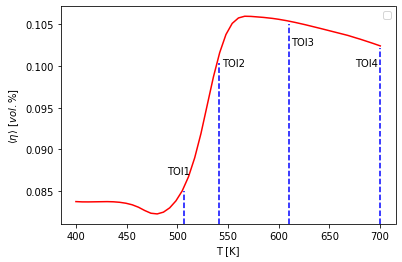

In [16]:
eta_s=UnivariateSpline(x=t, 
                       y=eta, 
                       w=None, bbox=[None, None], k=3, s=5.6e-8, 
                       ext=0, check_finite=False)


plt.plot(T,eta_s(t),color="r")
plt.axvline(x = 507,ymin=0, ymax=0.15, color = 'b',linestyle='dashed')
plt.text(490,0.087,'TOI1')
plt.axvline(x = 541,ymin=0, ymax=0.74, color = 'b',linestyle='dashed')
plt.text(544,0.1,'TOI2')
plt.axvline(x = 610,ymin=0, ymax=0.92, color = 'b',linestyle='dashed')
plt.text(612,0.1025,'TOI3')
plt.axvline(x = 700,ymin=0, ymax=0.81, color = 'b',linestyle='dashed')
plt.text(675,0.1,'TOI4')
plt.xlabel("T [K]")
plt.ylabel(r"$\langle \eta \rangle ~\left[vol. \% \right] $")

plt.legend()

In [18]:
t_surf_mod = t[t>0]
surf_mod=surf[t>0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


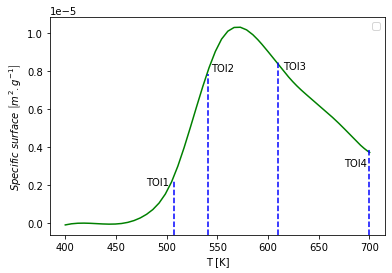

In [19]:
surf_mod2 =  surf_mod# np.hstack(( 0.4e-6,0.5e-6, surf_mod))
t_surf_mod2 =t_surf_mod #np.hstack(( 0,75, t_surf_mod))

surf_s=UnivariateSpline(x=t_surf_mod2 , 
                        y=surf_mod2 , 
                        w=None, bbox=[None, None], k=3, s=1.1e-12,  # s: fitting parameter 
                        ext=0, check_finite=False)




dsurf_dt_s  = surf_s.derivative(n=1)(t)


#plt.plot(t,surf)
plt.plot(T,surf_s(t),color="g")
plt.axvline(x = 507,ymin=0, ymax=0.25, color = 'b',linestyle='dashed')
plt.text(480,0.2e-5,'TOI1')
plt.axvline(x = 541,ymin=0, ymax=0.74, color = 'b',linestyle='dashed')
plt.text(544,0.8e-5,'TOI2')
plt.axvline(x = 610,ymin=0, ymax=0.8, color = 'b',linestyle='dashed')
plt.text(615,0.81e-5,'TOI3')
plt.axvline(x = 700,ymin=0, ymax=0.4, color = 'b',linestyle='dashed')
plt.text(675,0.3e-5,'TOI4')

plt.xlabel("T [K]")
plt.ylabel(r"$Specific~surface~\left[m^2. g^{-1}\right]$")

plt.legend()

Text(0, 0.5, 'Vacancy site fraction [--]')

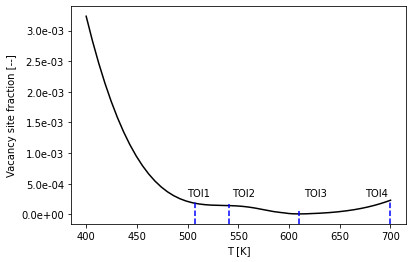

In [33]:
import matplotlib.ticker as mtick
fig = plt.figure()

ax = fig.add_subplot(111)

xv_out_s=UnivariateSpline(x=T , 
                        y=xv_out , 
                        w=None, bbox=[None, None], k=3, s=1.1e-12,  # s: fitting parameter 
                        ext=0, check_finite=False)




plt.plot(T,xv_out_s(t),color="black")
plt.axvline(x = 507,ymin=0, ymax=0.1, color = 'b',linestyle='dashed')
plt.text(500,0.3e-3,'TOI1')
plt.axvline(x = 541,ymin=0, ymax=0.09, color = 'b',linestyle='dashed')
plt.text(544,0.3e-3,'TOI2')
plt.axvline(x = 610,ymin=0, ymax=0.06, color = 'b',linestyle='dashed')
plt.text(615,0.3e-3,'TOI3')
plt.axvline(x = 700,ymin=0, ymax=0.1, color = 'b',linestyle='dashed')
plt.text(675,0.3e-3,'TOI4')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xlabel("T [K]")
plt.ylabel(r"Vacancy site fraction [--]")
